In [1]:
import cv2
import os
import glob
import numpy as np
from tqdm import tqdm # Used to display a progress bar
from sklearn.model_selection import train_test_split
from skimage import io
import matplotlib.pyplot as plt

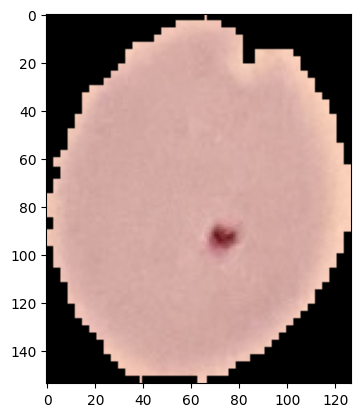

In [2]:
import os
# accessing an image file from the dataset classes
image = io.imread(r"D:\Project\machine-learning-project\image_data\cell_image\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_180.png")
# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

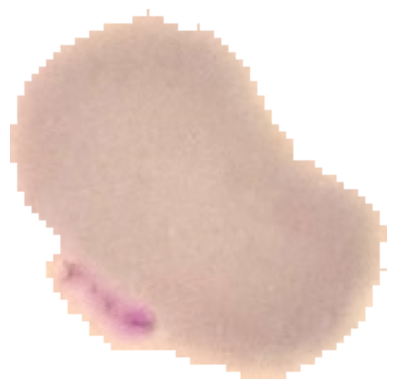

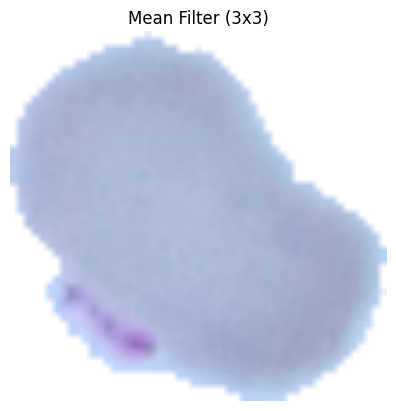

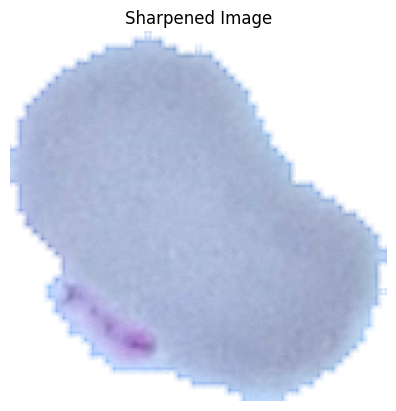

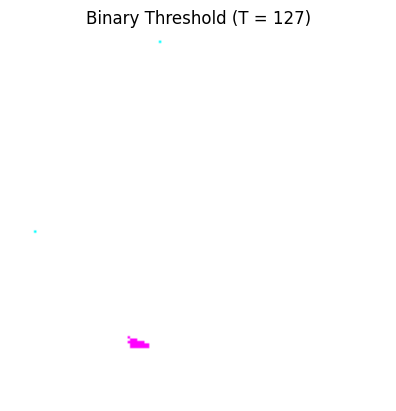

In [3]:


img = cv2.imread(r"D:\Project\machine-learning-project\image_data\cell_image\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_182.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# replace black background with white
mask = np.all(img_rgb < 40, axis=2)   # threshold for "black"
img_rgb[mask] = [255, 255, 255]       # set white

plt.imshow(img_rgb)
plt.axis("off")
plt.show()
# SMOOTHHING AND BLURING
# Reload grayscale image for filtering

# # Convert BGR → RGB for proper display
img_rgb2 = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Mean (average) filter with 3x3 kernel
mean = cv2.blur(img_rgb2, (3, 3))

plt.imshow(mean, cmap="gray")
plt.title("Mean Filter (3x3)")
plt.axis("off")
plt.show()


kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

sharpened = cv2.filter2D(mean, -1, kernel)

plt.imshow(sharpened, cmap="gray")
plt.title("Sharpened Image")
plt.axis("off")
plt.show()



# Global binary thresholding
_, thresh = cv2.threshold(sharpened, 127, 255, cv2.THRESH_BINARY) #255 maxval->The value assigned to pixels above the threshold

plt.imshow(thresh, cmap="gray")
plt.title("Binary Threshold (T = 127)")
plt.axis("off")
plt.show()

In [4]:
import cv2
import os
import numpy as np

input_dir = r"D:\Project\machine-learning-project\image_data\cell_image\parasitized"  # مكان الصور
output_dir = r"D:\Project\machine-learning-project\image_data\cell_image_processed\processed_cells_updated"  # فولدر هيتحفظ فيه النتائج

# اعمل فولدر لو مش موجود
os.makedirs(output_dir, exist_ok=True)

# kernel حق الشاربن
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# امشي على كل الفايلات والفولدرات
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            
            # full path للصورة
            img_path = os.path.join(root, file)

            # Read image
            img = cv2.imread(img_path)

            if img is None:
                print("Error reading:", img_path)
                continue





            # Convert BGR -> RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # replace black background with white
            mask = np.all(img_rgb < 40, axis=2)   # threshold for "black"
            img_rgb[mask] = [255, 255, 255]       # set white

            # Mean filter
            mean = cv2.blur(img_rgb, (3, 3))

            # Sharpen
            sharpened = cv2.filter2D(mean, -1, kernel)

            # Convert to gray for threshold
            gray = cv2.cvtColor(sharpened, cv2.COLOR_RGB2GRAY)

            # Threshold
            _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

            # Path to save
            save_path = os.path.join(
                output_dir, os.path.relpath(img_path, input_dir)
            )

            # Create folder structure before saving
            os.makedirs(os.path.dirname(save_path), exist_ok=True)

            # Save processed image
            cv2.imwrite(save_path, thresh)

            print("Processed:", img_path)


Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_1441

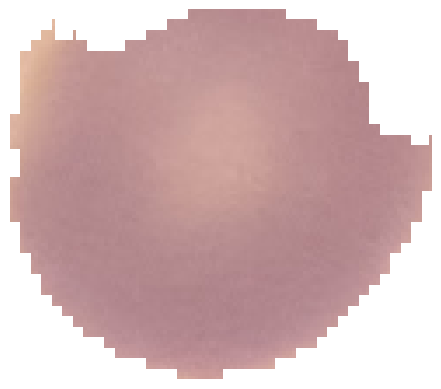

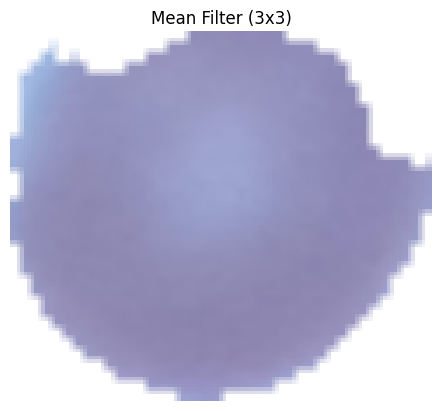

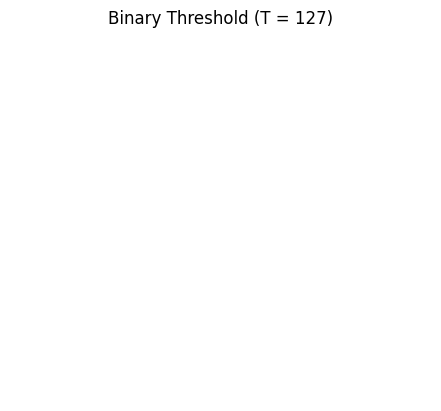

In [5]:
img = cv2.imread(r"D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C1_thinF_IMG_20150604_104722_cell_15.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# replace black background with white
mask = np.all(img_rgb < 40, axis=2)   # threshold for "black"
img_rgb[mask] = [255, 255, 255]       # set white

plt.imshow(img_rgb)
plt.axis("off")
plt.show()
# SMOOTHHING AND BLURING
# Reload grayscale image for filtering
# Convert BGR → RGB for proper display
img_rgb2 = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Mean (average) filter with 3x3 kernel
mean = cv2.blur(img_rgb2, (3, 3))

plt.imshow(mean, cmap="gray")
plt.title("Mean Filter (3x3)")
plt.axis("off")
plt.show()


# kernel = np.array([[0,-1,0],
#                    [-1,5,-1],
#                    [0,-1,0]])

# sharpened = cv2.filter2D(img_rgb, -1, kernel)

# plt.imshow(sharpened, cmap="gray")
# plt.title("Sharpened Image")
# plt.axis("off")
# plt.show()



# Global binary thresholding
_, thresh = cv2.threshold(mean, 127, 255, cv2.THRESH_BINARY) #255 maxval->The value assigned to pixels above the threshold

plt.imshow(thresh, cmap="gray")
plt.title("Binary Threshold (T = 127)")
plt.axis("off")
plt.show()

In [6]:
import cv2
import os
import numpy as np

input_dir = r"D:\Project\machine-learning-project\image_data\cell_image\Uninfected"  # مكان الصور
output_dir = r"D:\Project\machine-learning-project\image_data\cell_image_processed\processed_cells_Uninfected"  # فولدر هيتحفظ فيه النتائج

# اعمل فولدر لو مش موجود
os.makedirs(output_dir, exist_ok=True)

# kernel حق الشاربن
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# امشي على كل الفايلات والفولدرات
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):

            # full path للصورة
            img_path = os.path.join(root, file)

            # Read image
            img = cv2.imread(img_path)

            if img is None:
                print("Error reading:", img_path)
                continue

            # Convert BGR -> RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


            # replace black background with white
            mask = np.all(img_rgb < 40, axis=2)   # threshold for "black"
            img_rgb[mask] = [255, 255, 255]       # set white

            # Mean filter
            mean = cv2.blur(img_rgb, (3, 3))

            # Convert to gray for threshold
            gray = cv2.cvtColor(mean, cv2.COLOR_RGB2GRAY)

            # Threshold
            _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

            # Path to save
            save_path = os.path.join(
                output_dir, os.path.relpath(img_path, input_dir)
            )

            # Create folder structure before saving
            os.makedirs(os.path.dirname(save_path), exist_ok=True)

            # Save processed image
            cv2.imwrite(save_path, thresh)

            print("Processed:", img_path)


Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_128.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_131.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_144.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_21.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_25.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_34.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_48.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_65.p

In [7]:
#  Set Paths and Target Size
# **TODO: 
DATA_DIR = r"D:\Project\machine-learning-project\image_data\cell_image_processed"
TARGET_SIZE = (64, 64) 



In [8]:
# Classes: Parasitized (0) and Uninfected (1)
CATEGORIES = ['processed_cells_updated', 'processed_cells_Uninfected'] 

# Lists to store the processed image arrays (X) and their labels (y)
all_processed_images = []
all_labels = []


def preprocess_image(image_path, target_size=TARGET_SIZE):
    """Function to load, resize, and scale a single image."""
    
    # 1. Load the image (OpenCV loads images in BGR format by default)
    img = cv2.imread(image_path)
    
    # Check for Integrity (Handle cases where the image fails to load)
    if img is None:
        return None

    # 2. Standardize dimensions (Resizing)
    # All images must have the same input size for the Model
    img_resized = cv2.resize(img, target_size)

    # 3. Convert BGR to RGB (Most deep learning models expect RGB format)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # 4. Scale the pixel values from [0, 255] to [0.0, 1.0]
    # Scaling speeds up convergence during model training
    img_scaled = img_rgb / 255.0

    return img_scaled



In [9]:
## Loop Through and Process all Images

print(f" Starting Image Preprocessing for {len(CATEGORIES)} Categories ")
current_label = 0 # 0 for Parasitized, 1 for Uninfected

for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    # Get all image paths (assuming .png format)
    image_paths = glob.glob(os.path.join(path, '*.png'))
    
    print(f"\nProcessing {len(image_paths)} images in category: {category}")
    
    # Use tqdm to show a progress bar for the long loading process
    for image_path in tqdm(image_paths, desc=f"Cleaning {category}"):
        
        processed_img = preprocess_image(image_path)
        
        if processed_img is not None:
            # Append the processed image array
            all_processed_images.append(processed_img)
            # Append the corresponding label (0 or 1)
            all_labels.append(current_label)
        
    current_label += 1 




 Starting Image Preprocessing for 2 Categories 

Processing 13779 images in category: processed_cells_updated


Cleaning processed_cells_updated: 100%|██████████| 13779/13779 [00:03<00:00, 3599.86it/s]



Processing 13779 images in category: processed_cells_Uninfected


Cleaning processed_cells_Uninfected: 100%|██████████| 13779/13779 [00:04<00:00, 2945.43it/s]


In [10]:
## 2. Final Conversion to NumPy Arrays

print("\nFinalizing Data Arrays")

# Convert lists to NumPy arrays, which are mandatory for CNN input
X_images = np.array(all_processed_images, dtype=np.float32)

y_labels = np.array(all_labels)

print(f"SUCCESS: Total images processed: {len(X_images)}")
# The final shape is (Number_of_Images, Height, Width, Color_Channels)
print(f"Final Image Data Shape (X_images): {X_images.shape}")
print(f"Final Label Data Shape (y_labels): {y_labels.shape}")




Finalizing Data Arrays
SUCCESS: Total images processed: 27558
Final Image Data Shape (X_images): (27558, 64, 64, 3)
Final Label Data Shape (y_labels): (27558,)


In [33]:

features_img = X_images      
target_labels = y_labels     

X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(
    features_img, 
    target_labels, 
    test_size=0.20, 
    random_state=42,

    stratify=target_labels
)

# Verify Dimensions
print("\n Image Data Splitting Completed ")
print(f"Total Images: {len(X_images)}")
print(f"Training Images (80%): {len(X_train_img)}")
print(f"Testing Images (20%): {len(X_test_img)}")
print(f"Training Features Shape: {X_train_img.shape}")
print(f"Testing Labels Shape: {y_test_img.shape}")


 Image Data Splitting Completed 
Total Images: 27558
Training Images (80%): 22046
Testing Images (20%): 5512
Training Features Shape: (22046, 64, 64, 3)
Testing Labels Shape: (5512,)


In [34]:
# 1. Save the Training and Testing Images (Features)
np.save('X_train_img.npy', X_train_img)
np.save('X_test_img.npy', X_test_img)

# 2. Save the Training and Testing Labels (Targets)
np.save('y_train_img.npy', y_train_img)
np.save('y_test_img.npy', y_test_img)

In [103]:
from sklearn.cluster import KMeans

# 1. Load the Training and Testing Images (Features)
X_train_img = np.load('X_train_img.npy')
X_test_img = np.load('X_test_img.npy')

In [104]:
from skimage.feature import hog

X_features = []

for img in all_processed_images:
    
    if img.dtype == "float64" or img.dtype == "float32":
        img = (img * 255).astype("uint8")

    img = cv2.resize(img, (128, 128))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    features = hog(
        gray, 
        pixels_per_cell=(16,16), 
        cells_per_block=(2,2),
        orientations=9
    )

    X_features.append(features)

X_features = np.array(X_features, dtype=np.float32)


In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)  
X_reduced = pca.fit_transform(X_features)

In [106]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X_reduced)
kmeans.cluster_centers_

array([[ 1.94889295e+00,  1.08153969e-01,  1.67907178e-02,
        -9.13678668e-04,  1.21298507e-02,  2.95693404e-04,
        -9.06839594e-03,  3.24802054e-03,  1.05539802e-03,
        -5.04176086e-03, -9.61483270e-03,  8.15156568e-03,
        -1.28218206e-02, -8.76645185e-03,  3.17524793e-03,
         6.00815238e-03, -1.56998460e-04,  1.75528706e-03,
        -7.12757185e-03, -1.89293902e-02, -1.06104920e-02,
         3.64025729e-03,  1.32451784e-02, -3.45414766e-04,
        -1.40022999e-03,  1.40754055e-04,  1.62328023e-03,
         1.15098082e-03,  2.05665085e-04,  5.43352729e-03,
         5.96163794e-03,  1.35207898e-04,  6.45308523e-04,
         2.14736024e-03, -4.99981281e-04, -2.27525318e-03,
         2.91247899e-03, -2.38529989e-03,  1.16492905e-04,
         1.18476478e-03,  2.01681582e-03, -2.01544794e-03,
         4.12315101e-04, -1.15764968e-03, -1.93241387e-04,
        -6.02819899e-04, -9.29953821e-04, -2.97701312e-03,
        -3.55647085e-03,  3.76031920e-03,  1.52431673e-0

In [108]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_reduced, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.4177272915840149


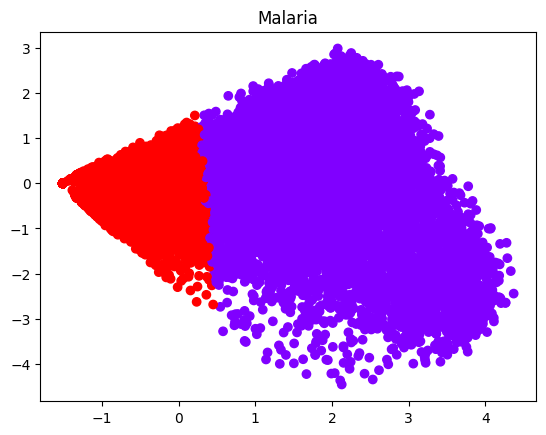

In [109]:

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title('Malaria')
plt.show()

In [110]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,20):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(X_reduced)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)

# Check the result
wcss

[307211.375,
 239105.890625,
 224158.625,
 217837.0625,
 214139.578125,
 211431.3125,
 208928.078125,
 207140.59375,
 205336.625,
 203326.796875,
 201502.59375,
 200318.984375,
 198549.34375,
 197337.125,
 196270.109375,
 194918.90625,
 194072.4375,
 193307.21875,
 191904.015625]

Text(0, 0.5, 'WCSS')

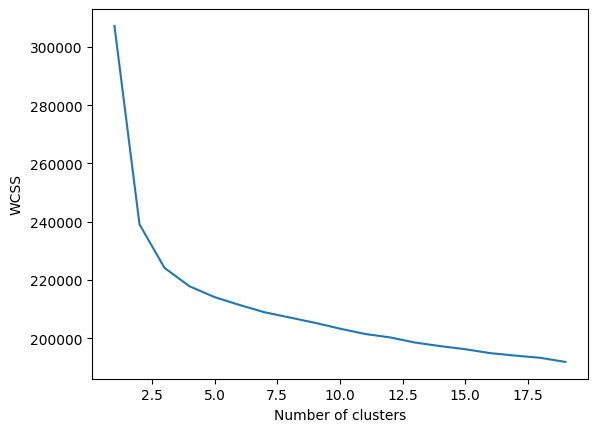

In [111]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,20),wcss)

# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [112]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_reduced)


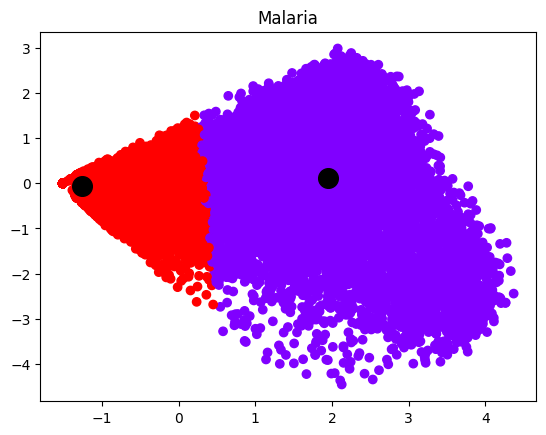

In [113]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'k') #for centroid points
plt.title('Malaria')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
def cluster_acc(y_true, y_pred):
    # confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    # استخدم Hungarian algorithm عشان نلاقي أفضل mapping
    row_ind, col_ind = linear_sum_assignment(-cm)
    return cm[row_ind, col_ind].sum() / y_true.size

accuracy = cluster_acc(y_labels, y_kmeans)
print("K-means Accuracy:", accuracy)

K-means Accuracy: 0.8617098483199072


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
X_train_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_train_img], dtype='float32')
X_test_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_test_img], dtype='float32')

X_train_small = np.array([cv2.resize(img, (16, 16)) for img in X_train_gray], dtype='float32')
X_test_small = np.array([cv2.resize(img, (16, 16)) for img in X_test_gray], dtype='float32')

X_train_flat = X_train_small.reshape(X_train_small.shape[0], -1)
X_test_flat = X_test_small.reshape(X_test_small.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [116]:
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train_img)

y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test_img, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n")
print(classification_report(y_test_img, y_pred))

Logistic Regression Accuracy: 83.64%
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      2756
           1       0.76      0.97      0.86      2756

    accuracy                           0.84      5512
   macro avg       0.86      0.84      0.83      5512
weighted avg       0.86      0.84      0.83      5512



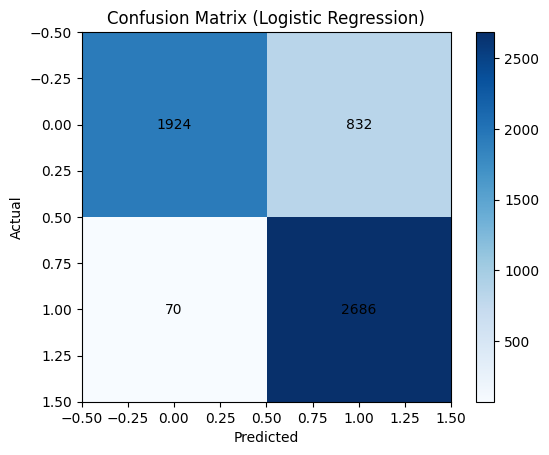

In [117]:
cm = confusion_matrix(y_test_img, y_pred)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add numbers on each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()